In [122]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

sns.set_style("whitegrid")

In [20]:
def loadData(directory):
    
    df = pd.read_csv(directory,sep="\t")
    
    return df

X_dev = loadData('Dataset/dev.tsv')
X_eval = loadData('Dataset/eval.tsv')

In [21]:
## shapes
X_dev.shape, X_eval.shape

((120744, 9), (30186, 8))

In [22]:
## dev null values
X_dev.isnull().sum()

country            5
description        0
designation    36518
province           5
region_1       20008
region_2       72008
variety            0
winery             0
quality            0
dtype: int64

In [23]:
## eval null values
X_eval.isnull().sum()

country            0
description        0
designation     9217
province           0
region_1        5052
region_2       17969
variety            0
winery             0
dtype: int64

In [24]:
X_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120744 entries, 0 to 120743
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120739 non-null  object 
 1   description  120744 non-null  object 
 2   designation  84226 non-null   object 
 3   province     120739 non-null  object 
 4   region_1     100736 non-null  object 
 5   region_2     48736 non-null   object 
 6   variety      120744 non-null  object 
 7   winery       120744 non-null  object 
 8   quality      120744 non-null  float64
dtypes: float64(1), object(8)
memory usage: 8.3+ MB


In [25]:
X_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30186 entries, 0 to 30185
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   country      30186 non-null  object
 1   description  30186 non-null  object
 2   designation  20969 non-null  object
 3   province     30186 non-null  object
 4   region_1     25134 non-null  object
 5   region_2     12217 non-null  object
 6   variety      30186 non-null  object
 7   winery       30186 non-null  object
dtypes: object(8)
memory usage: 1.8+ MB


In [26]:
X_dev.info

<bound method DataFrame.info of           country                                        description  \
0          France  A creamed pear wine, with an attractive tang o...   
1              US  Simple and dry, this Cabernet has modest black...   
2              US  This lovely wine captures the floral, perfumed...   
3        Portugal  The aromas are the thing here, as so often wit...   
4           Italy  This is an interesting, outright strange wine ...   
...           ...                                                ...   
120739      Italy  This is a lovely Sauvignon with very character...   
120740      Spain  Opens somewhat clipped and choppy, with citrus...   
120741  Australia  Surprisingly complete and harmonious for a Rie...   
120742    Germany  Broad aromas of ripe yellow fruit and a hint o...   
120743   Portugal  A classic Douro blend of Touriga Nacional, Tou...   

                               designation            province  \
0                     Brut Blanc de B

In [12]:
X_dev.head()

,country,description,designation,province,region_1,region_2,variety,winery,quality
0,France,"A creamed pear wine, with an attractive tang o...",Brut Blanc de Blancs,Alsace,Crémant d'Alsace,NaN,Pinot Blanc,Lucien Albrecht,45.0
1,US,"Simple and dry, this Cabernet has modest black...",NaN,California,Paso Robles,Central Coast,Cabernet Sauvignon,Castle Rock,31.0
2,US,"This lovely wine captures the floral, perfumed...",NaN,Oregon,Willamette Valley,Willamette Valley,Gewürztraminer,Château Bianca,35.0
3,Portugal,"The aromas are the thing here, as so often wit...",NaN,Alentejano,NaN,NaN,Touriga Nacional,Herdade do Esporão,41.0
4,Italy,"This is an interesting, outright strange wine ...",Natì,Southern Italy,Pompeiano,NaN,Coda di Volpe,Sorrentino,37.0


## Questions

* See the categorical values and their cardinalities.
* What are the countries with more wines? And provinces? And Regions? 
* What are the average rates per country? And for designation? 
* What are the wines with the best and the worse quality? 
* What are the most used words for the description? 
* What is the length distribution for the description? 


In [55]:
## 1 - Cardinalities of categorical attributes
designation_counter = Counter(X_dev["designation"])
print(f"Number of different designations : {len(designation_counter)}")
designation_counter.most_common()[:10]

Number of different designations : 27801


[(nan, 36518),
 ('Reserve', 2189),
 ('Reserva', 1436),
 ('Estate', 1245),
 ('Barrel sample', 1069),
 ('Riserva', 609),
 ('Barrel Sample', 505),
 ('Brut', 483),
 ('Crianza', 398),
 ('Estate Grown', 362)]

In [65]:
designation_province = Counter(X_dev["province"])
print(f"Number of different provinces : {len(designation_province)}")
designation_province.most_common()[:10]

Number of different provinces : 445


[('California', 35572),
 ('Washington', 7818),
 ('Tuscany', 5843),
 ('Bordeaux', 4866),
 ('Northern Spain', 3930),
 ('Mendoza Province', 3795),
 ('Oregon', 3661),
 ('Burgundy', 3447),
 ('Piedmont', 3279),
 ('Veneto', 3186)]

In [61]:
designation_region_1 = Counter(X_dev["region_1"])
print(f"Number of different region_1 : {len(designation_region_1)}")
designation_region_1.most_common()[:10]

Number of different designations : 1207


[(nan, 20008),
 ('Napa Valley', 4983),
 ('Columbia Valley (WA)', 3988),
 ('Mendoza', 2864),
 ('Russian River Valley', 2842),
 ('California', 2757),
 ('Paso Robles', 2450),
 ('Willamette Valley', 1647),
 ('Rioja', 1524),
 ('Toscana', 1517)]

In [63]:
# I think it can be avoided -> Too general 
designation_region_2 = Counter(X_dev["region_2"])
print(f"Number of different region_2 : {len(designation_region_2)}")
designation_region_2.most_common()[:10]

Number of different designations : 19


[(nan, 72008),
 ('Central Coast', 10411),
 ('Sonoma', 9016),
 ('Columbia Valley', 7337),
 ('Napa', 7070),
 ('California Other', 2801),
 ('Willamette Valley', 2541),
 ('Mendocino/Lake Counties', 1918),
 ('Sierra Foothills', 1327),
 ('Napa-Sonoma', 1285),
 ('Finger Lakes', 1195),
 ('Central Valley', 882),
 ('Long Island', 629),
 ('Southern Oregon', 533),
 ('Oregon Other', 522),
 ('North Coast', 502),
 ('Washington Other', 481),
 ('South Coast', 165),
 ('New York Other', 121)]

In [64]:
# I think it can be avoided -> Too general 
designation_variety = Counter(X_dev["variety"])
print(f"Number of different varieties : {len(designation_variety)}")
designation_variety.most_common()[:10]

Number of different varieties : 603


[('Chardonnay', 11534),
 ('Pinot Noir', 11424),
 ('Cabernet Sauvignon', 10270),
 ('Red Blend', 8060),
 ('Bordeaux-style Red Blend', 5821),
 ('Sauvignon Blanc', 4986),
 ('Syrah', 4655),
 ('Riesling', 4424),
 ('Merlot', 4070),
 ('Zinfandel', 3045)]

In [66]:
# I think it can be avoided -> Too general 
designation_winery = Counter(X_dev["winery"])
print(f"Number of different wineries : {len(designation_winery)}")
designation_winery.most_common()[:10]

Number of different wineries : 14105


[('Williams Selyem', 313),
 ('Testarossa', 215),
 ('DFJ Vinhos', 198),
 ('Chateau Ste. Michelle', 184),
 ('Columbia Crest', 174),
 ('Bouchard Père & Fils', 168),
 ('Concha y Toro', 166),
 ('Kendall-Jackson', 163),
 ('Trapiche', 156),
 ('Joseph Drouhin', 156)]

### Quality distribution

<AxesSubplot:xlabel='quality'>

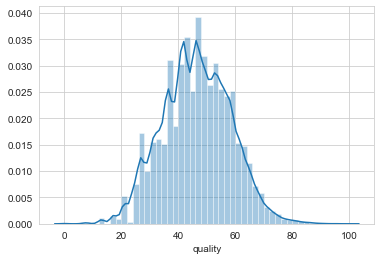

In [68]:
## scores distribution 
sns.distplot(X_dev["quality"])

### Number of wines with a score below 10 and above 90

In [82]:
print(f"Number of wines with a score below 10 : {len(X_dev [ X_dev['quality'] <= 10 ] )} ")
print(f"Number of wines with a score above 90 : {len(X_dev [ X_dev['quality'] >= 90 ] )} ")

Number of wines with a score below 10 : 84 
Number of wines with a score above 90 : 29 


### Distributions of wines per country

Text(0.5, 0, 'Number of collected wines')

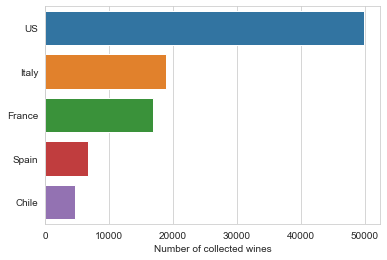

In [153]:
wines_per_country  = Counter(X_dev['country']).most_common()[:5]
#sns.barplot(x=values, y=labels)

labels = [ couple[0] for couple in wines_per_country ]
values = [ couple[1] for couple in wines_per_country ]

sns.barplot(x=values, y=labels)
plt.xlabel("Number of collected wines")

Text(0.5, 0, 'Average quality')

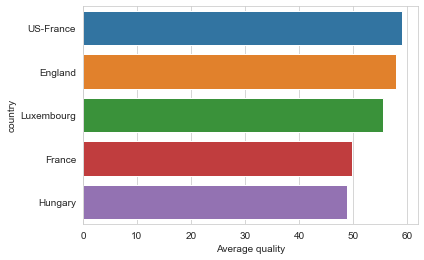

In [154]:
## it is strongly affected by the frequency!! Hilight it
avg_df_country = X_dev.groupby('country').mean().sort_values(by="quality",ascending=False)[:5]
sns.barplot(x=avg_df_country.values.reshape(1,-1)[0], y=avg_df_country.index)
plt.xlabel("Average quality")

## Length distribution

<AxesSubplot:xlabel='description_length'>

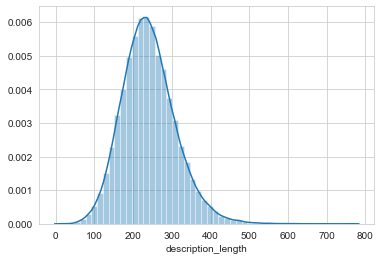

In [171]:
X_temp = X_dev[['description','quality']].copy()
X_temp['description_length'] = X_temp['description'].apply(lambda x : len(x))

sns.distplot(X_temp['description_length'])

## Correlation among length and quality 

In [173]:
X_temp = X_dev[['description','quality']].copy()
X_temp['description_length'] = X_temp['description'].apply(lambda x : len(x))

X_temp.corr()['quality']

quality               1.0000
description_length    0.2935
Name: quality, dtype: float64

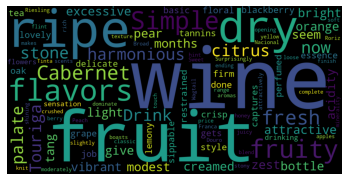

In [183]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import random

wc = WordCloud(width=1200, height=600,max_words=100, stopwords = STOPWORDS,
               min_word_length=3, min_font_size=3).generate(''.join(str(X_temp['description'].values)))

plt.imshow(wc.recolor(random_state=3))
plt.axis('off')
plt.savefig("fig2.svg", format="svg")

### Notes

* Making a country as a one-hot vector is not desirable as if your dataset contains all the countries in the earth, your one-hot vector would be mostly zero which increases your train and run-time complexities. Instead, calculate the distance of each country from a single point on earth. Ex: Distance of each of those countries from the equator or south pole or north pole and add it as a feature instead of a one-hot vector.
* https://stats.stackexchange.com/questions/411767/encoding-of-categorical-variables-with-high-cardinality [hashing]
* Check if we have some categorical attribute that it is not present in the evaluation set -> Highlight this aspect on the report